### Задание 55. Вариант 7

Имеется нелинейный функционал $F: L^2(a;b) \rightarrow R$, принимающий единственной экстремальное значение на своей области определения $D_F$.

A. При помощи уравнения Эйлера-Лагранжа найти экстремум функционаала $F$ и выяснить его типа (максимум или минимум).

B. Методом Ритца провести приближенную оптимизацию функционала $F$. Проиллюстрировать графически сходимость приближений, полученных методом Ритца, к точному решению экстремальной задачи.

$$
7. \ F[x] = \int_1^2 (6s^2 x + s(x^\prime - 2cos(2\pi s))^2)ds
\\
D_F - множество \ дважды \ непрерывно \ дифференцируемых \ функций, \ удовлетворяющих \ граничным \ условиям \ x(1) = 0, \ x(2) = 1
$$


### B) Решение

Выберем и зафиксируем произвольную функцию $x_0 \in D_F$

$$
x_0(s) = s - 1
$$

Тогда $x = x_0 + \tilde x$, где $\tilde x \in \tilde D_F$ - множество дважды непрерывно дифференцируемых функций, удовлетворяющих нулевым граничным условиям $x(1) = x(2) = 0$

Поскольку $\tilde D_F$ является линейным подпространством в $L^2(1;2)$, далее выберем полную ЛНЗ систему $\{e_k\}_{k=1}^{\infty}$ в пространстве $L^2(1;2)$, такую что $e_k \in \tilde D_F$

$$
    e_k = (s-1)^k (s-2)
$$

Минимизацию функционала $F$ на $D_F$ заменим минимизацией на элементах вида $x_n = x_0 + \sum_{i=1}^n c_i e_i$

Общее уравнение системы $n$ неизвестных относительно $c_1, c_2, ...$:

$$
    \sum_{i=1}^n c_i \int_1^2 2 e_i^{\prime} e_k^{\prime} s ds = \int_1^2 (2s(2\cos(2 \pi s) - x_0^{\prime})e_k^{\prime} - 6s^2 e_k ) ds
$$

Найдем $x_2, x_3, x_4$:

In [62]:
import numpy as np
from sympy import *
init_printing()

s,k = symbols('s k')
x_0, e_k, x_n = symbols('x_0 e_k x_n')
c_1, c_2, c_3, c_4, c_5, c_6 = symbols('c_1 c_2 c_3 c_4 c_5 c_6')
c_i = [c_1, c_2, c_3, c_4, c_5, c_6]

x_0 = s - 1
e_k = (s-1)**k*(s-2)

In [63]:
sumRight = symbols('sumRight')
sumRight = 0
equations = []
temp = 0

for i in range(1, 7):
    for j in range(1, 7):
        sumRight = sumRight + 2 * c_i[j - 1] * integrate( diff(e_k.subs(k,j), s) * diff(e_k.subs(k,i), s) * s, (s, 1, 2) )
    temp = integrate( 2*s*(2*cos(2*pi*s) - diff(x_0,s))*diff(e_k.subs(k,i), s) - 6*(s**2)*e_k.subs(k,i), (s, 1, 2))
    equations.append( Eq(sumRight, temp ) )   
    sumRight = 0

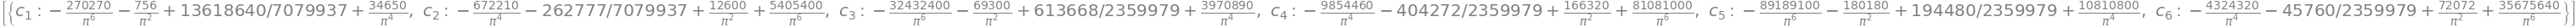

In [64]:
c_k = symbols('c_k')
c_k = []
c_k = solve(equations, dict = True)


In [65]:
x_n = x_0
for i in range(1, 4):
    x_n = x_n + c_k[0][c_i[i-1]].n() * e_k.subs(k,i)

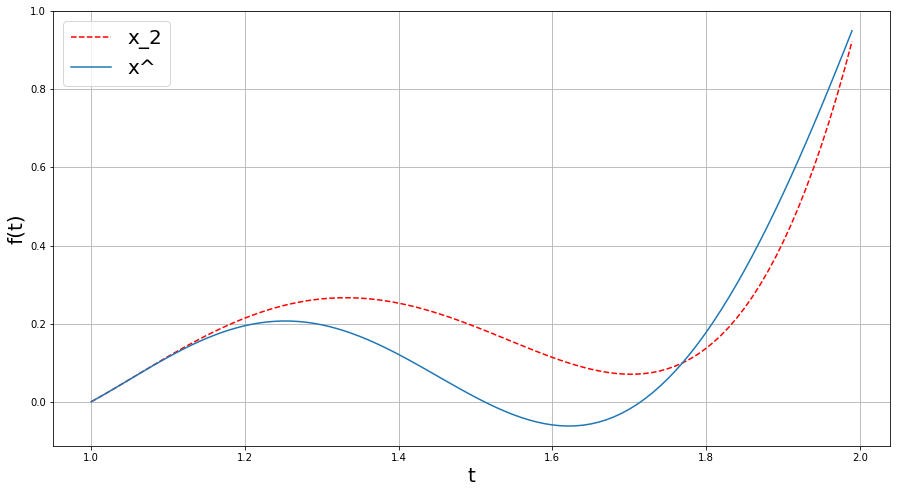

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

f = symbols('f')
f = (s**3)/3 - 4*(log(s)/log(8)) + (sin(2*pi*s))/pi - 1/3

Ox = np.arange(1, 2, 0.01)

Oy1 = [x_n.subs(s, val) for val in Ox]
Oy2 = [f.subs(s, val) for val in Ox]

plt.figure(figsize=(15,8))
plt.xlabel('t', fontsize = 20)
plt.ylabel('f(t)', fontsize = 20)
plt.plot(Ox, Oy1,'r--', Ox, Oy2)
plt.legend(['x_2', 'x^'], fontsize = 20)
plt.grid()
plt.show()

In [67]:
x_n = x_0
for i in range(1, 6):
    x_n = x_n + c_k[0][c_i[i-1]].n() * e_k.subs(k,i)
x_n

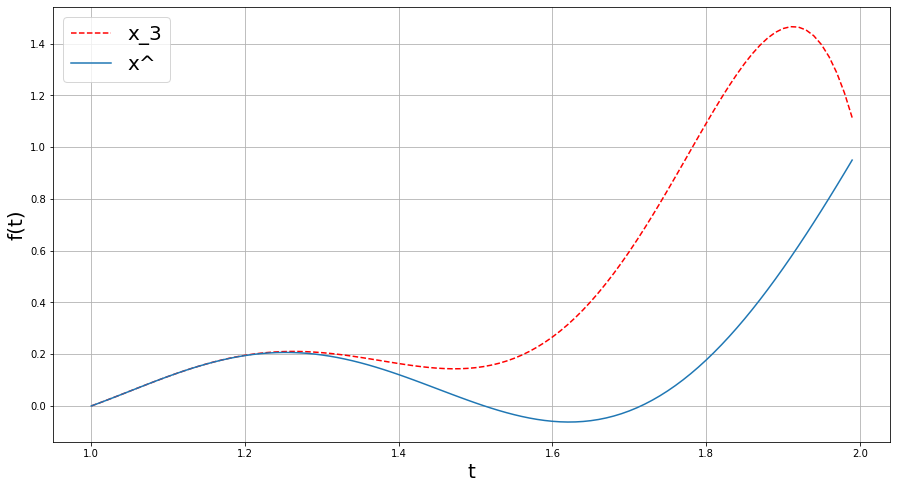

In [68]:
Ox = np.arange(1, 2, 0.01)

Oy1 = [x_n.subs(s, val) for val in Ox]
Oy2 = [f.subs(s, val) for val in Ox]

plt.figure(figsize=(15,8))
plt.xlabel('t', fontsize = 20)
plt.ylabel('f(t)', fontsize = 20)
plt.plot(Ox, Oy1,'r--', Ox, Oy2)
plt.legend(['x_3', 'x^'], fontsize = 20)
plt.grid()
plt.show()

In [69]:
x_n = x_0
for i in range(1, 7):
    x_n = x_n + c_k[0][c_i[i-1]].n() * e_k.subs(k,i)
x_n

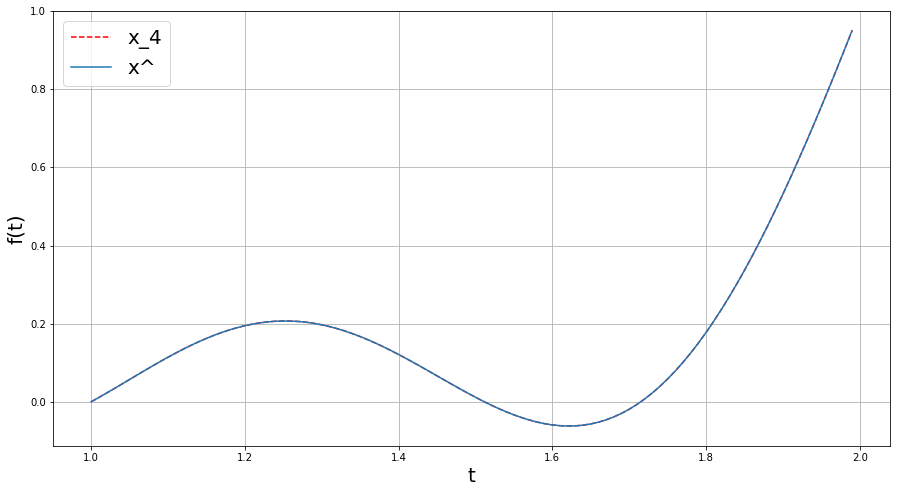

In [70]:
Ox = np.arange(1, 2, 0.01)

Oy1 = [x_n.subs(s, val) for val in Ox]
Oy2 = [f.subs(s, val) for val in Ox]

plt.figure(figsize=(15,8))
plt.xlabel('t', fontsize = 20)
plt.ylabel('f(t)', fontsize = 20)
plt.plot(Ox, Oy1,'r--', Ox, Oy2)
plt.legend(['x_4', 'x^'], fontsize = 20)
plt.grid()
plt.show()

По графикам наблюдается сходимость приближенного решения, полученных методом Ритца,к точному решению экстремальной задачи.

Таким образом, задача выполнена.

In [74]:
c_k[0][c_i[0]].n()